In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# 下载并预览数据

In [0]:
data = keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

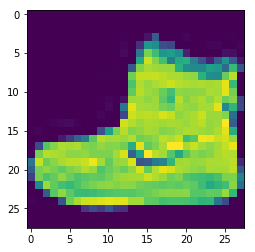

In [0]:
plt.imshow(x_train[0])

# 序列型（Sequential）建模

In [0]:
model = keras.models.Sequential()

model.add( keras.layers.Flatten(input_shape=[28,28]) )
model.add( keras.layers.Dense(100, activation='relu') )
model.add( keras.layers.Dense(10, activation='softmax') )


In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

model.add( Flatten(input_shape=[28,28]) )
model.add( Dense(100, activation='relu') )
model.add( Dense(10, activation='softmax') )

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential( [Flatten( input_shape=[28, 28] ),
                     Dense( 100, activation='relu' ),
                     Dense( 10, activation='softmax' )
                    ] )

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[1].name

'dense_11'

In [0]:
weights, biases = model.layers[1].get_weights()

In [0]:
weights

array([[-0.01193488,  0.07269572,  0.05208179, ..., -0.00347022,
         0.05664217,  0.0394345 ],
       [ 0.00584205,  0.00589866,  0.0481531 , ..., -0.06362244,
        -0.06850211,  0.05887195],
       [-0.07782969, -0.01904722, -0.01535878, ...,  0.06800838,
        -0.06107122, -0.00137782],
       ...,
       [ 0.07887568,  0.00490479, -0.04944256, ...,  0.07875963,
        -0.07387079,  0.06065156],
       [-0.05488511, -0.02359713, -0.04728891, ..., -0.06258013,
        -0.01370002,  0.08178167],
       [ 0.07035674, -0.01786634,  0.07013498, ..., -0.02767455,
         0.01171237, -0.01222234]], dtype=float32)

In [0]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
print( weights.shape )
print( biases.shape )

(784, 100)
(100,)


# 函数型（Functional）建模

In [0]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [0]:
input = Input( shape=[28,28] )
x = Flatten()( input )
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model( inputs=[input], outputs=[output] )

In [0]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# 子类化（Subclassing）建模

In [0]:
from tensorflow.keras.layers import Activation, Flatten, Dense, concatenate
from tensorflow.keras.models import Model

In [14]:
model1.layers

In [0]:
class SomeModel(Model):
  
  def __init__( self, units=100, numClass=10, **kwargs ):
    
    super().__init__(**kwargs)
    self.hidden = Dense( units, activation='relu' ) 
    self.main_output = Dense( numClass, activation='softmax' ) 

  def call( self, input ):
      
      x = Flatten()(input)
      hidden = self.hidden(x)
      output = self.main_output(hidden)
      return output

In [0]:
model = SomeModel()

In [18]:
model

In [30]:
model.layers

# 编译模型

In [0]:
model = Sequential()

model.add( Flatten(input_shape=[28,28]) )
model.add( Dense(100, activation='relu') )
model.add( Dense(10, activation='softmax') )

In [0]:
model.compile( loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'] )

# 拟合模型

In [0]:
model.fit( x_train, y_train, epochs=20 )

Epoch 1/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5016 - acc: 0.8249
Epoch 2/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3807 - acc: 0.8626
Epoch 3/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3401 - acc: 0.8770
Epoch 4/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3162 - acc: 0.8851
Epoch 5/20
60000/60000 [==============================] - 4s 58us/sample - loss: 0.2999 - acc: 0.8901
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2836 - acc: 0.8954
Epoch 7/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2731 - acc: 0.8989
Epoch 8/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2635 - acc: 0.9023
Epoch 9/20
60000/60000 [==============================] - 4s 58us/sample - loss: 0.2535 - acc: 0.9060
Epoch 10/20
60000/60000 [==============================] - 4s 59us/sample - loss: 

In [0]:
class myCallback( tf.keras.callbacks.Callback ):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
model = Sequential()

model.add( Flatten(input_shape=[28,28]) )
model.add( Dense(100, activation='relu') )
model.add( Dense(10, activation='softmax') )

model.compile( loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'] )

model.fit( x_train, y_train, epochs=20, callbacks=[callbacks] )

Epoch 1/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5013 - acc: 0.8233
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3789 - acc: 0.8623
Epoch 3/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3410 - acc: 0.8763
Epoch 4/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3171 - acc: 0.8852
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3004 - acc: 0.8897
Epoch 6/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2884 - acc: 0.8937
Epoch 7/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2734 - acc: 0.8985
Epoch 8/20
59712/60000 [============================>.] - ETA: 0s - loss: 0.2634 - acc: 0.9017
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2636 - acc: 0.9016


# 预测模型

In [0]:
prob = model.predict( x_test[0:1] )
prob

array([[4.18439913e-06, 1.58294569e-08, 1.01341634e-07, 3.87853927e-09,
        4.81276530e-08, 1.27529853e-03, 6.69016231e-07, 1.02730272e-02,
        7.33473257e-07, 9.88445997e-01]], dtype=float32)

In [0]:
import numpy as np

np.argmax(prob)

9

In [0]:
print( y_test[0] )

9


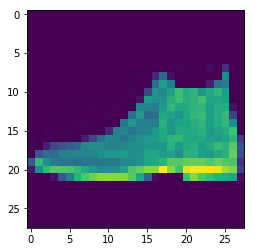

In [0]:
plt.imshow(x_test[0])

In [0]:
model.evaluate( x_test, y_test )

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3399 - acc: 0.8773


[0.3398971742153168, 0.8773]

In [0]:
# 训练精度 90% 但是测试精度 87.7%，有过拟合的征兆

## 引进验证集

In [0]:
data = keras.datasets.fashion_mnist

(x_train_full, y_train_full),(x_test, y_test) = data.load_data()

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class myCallback( tf.keras.callbacks.Callback ):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.9):
      print("\nReached 90% validation accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
model = Sequential()

model.add( Flatten(input_shape=[28,28]) )
model.add( Dense(100, activation='relu') )
model.add( Dense(10, activation='softmax') )

model.compile( loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'] )

history = model.fit( x_train,
                     y_train,
                     epochs=20, 
                     validation_data=(x_valid, y_valid), 
                     callbacks=[callbacks] )

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 69us/sample - loss: 0.5139 - acc: 0.8202 - val_loss: 0.4279 - val_acc: 0.8540
Epoch 2/20
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3893 - acc: 0.8605 - val_loss: 0.3629 - val_acc: 0.8740
Epoch 3/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3462 - acc: 0.8747 - val_loss: 0.3450 - val_acc: 0.8732
Epoch 4/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3232 - acc: 0.8825 - val_loss: 0.3272 - val_acc: 0.8808
Epoch 5/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3053 - acc: 0.8885 - val_loss: 0.3283 - val_acc: 0.8758
Epoch 6/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2891 - acc: 0.8925 - val_loss: 0.3739 - val_acc: 0.8540
Epoch 7/20
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2767 - acc: 0.8992 - val_loss: 0.3

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

data = keras.datasets.fashion_mnist

(x_train_full, y_train_full),(x_test, y_test) = data.load_data()

x_train_full = x_train_full.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


model = Sequential([Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax') ])

model.compile( loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'] )

history = model.fit( x_train,
                     y_train,
                     epochs=20, 
                     validation_data=(x_valid, y_valid) )

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 8s 149us/sample - loss: 0.4450 - acc: 0.8387 - val_loss: 0.3097 - val_acc: 0.8810
Epoch 2/20
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2956 - acc: 0.8917 - val_loss: 0.3552 - val_acc: 0.8670
Epoch 3/20
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2533 - acc: 0.9064 - val_loss: 0.2606 - val_acc: 0.9010
Epoch 4/20
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2205 - acc: 0.9184 - val_loss: 0.2286 - val_acc: 0.9158
Epoch 5/20
55000/55000 [==============================] - 5s 95us/sample - loss: 0.1919 - acc: 0.9279 - val_loss: 0.2335 - val_acc: 0.9160
Epoch 6/20
55000/55000 [==============================] - 5s 95us/sample - loss: 0.1689 - acc: 0.9359 - val_loss: 0.2343 - val_acc: 0.9160
Epoch 7/20
55000/55000 [==============================] - 5s 97us/sample - loss: 0.1471 - acc: 0.9437 - val_loss: 0.

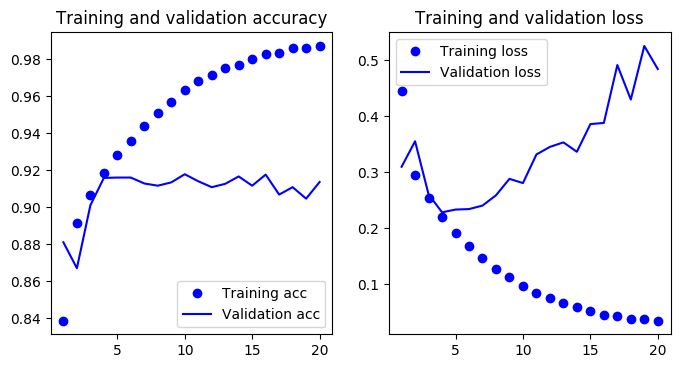

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure( figsize=(8,4), dpi=100 )

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from tensorflow.keras.layers import Dropout

model = Sequential([Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax') ])

model.compile( loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'] )

history = model.fit( x_train,
                     y_train,
                     epochs=20, 
                     validation_data=(x_valid, y_valid) )

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5144 - acc: 0.8096 - val_loss: 0.3468 - val_acc: 0.8754
Epoch 2/20
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3521 - acc: 0.8691 - val_loss: 0.2934 - val_acc: 0.8936
Epoch 3/20
55000/55000 [==============================] - 6s 104us/sample - loss: 0.3099 - acc: 0.8835 - val_loss: 0.2655 - val_acc: 0.8986
Epoch 4/20
55000/55000 [==============================] - 6s 104us/sample - loss: 0.2840 - acc: 0.8947 - val_loss: 0.2602 - val_acc: 0.8988
Epoch 5/20
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2635 - acc: 0.9020 - val_loss: 0.2403 - val_acc: 0.9100
Epoch 6/20
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2514 - acc: 0.9049 - val_loss: 0.2256 - val_acc: 0.9152
Epoch 7/20
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2387 - acc: 0.9095 - val_lo

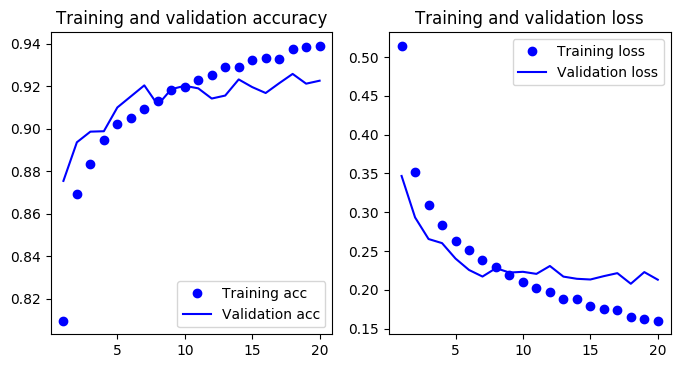

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure( figsize=(8,4), dpi=100 )

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Keras Tuner

In [35]:
!pip install tf-nightly-2.0-preview

     |████████████████████████████████| 88.8MB 558kB/s 
     |████████████████████████████████| 3.8MB 50.0MB/s 
     |████████████████████████████████| 71kB 33.0MB/s 
     |████████████████████████████████| 450kB 62.1MB/s 
  Created wheel for opt-einsum: filename=opt_einsum-3.0.1-cp36-none-any.whl size=58500 sha256=bdda2a4bd2a267f873ec739bc0738dffe036840a7d11bcd16fc7c6451449c228
  Stored in directory: /root/.cache/pip/wheels/91/98/8d/10e3d4e04c959597a411b91acd3695e9e2d210e68ce3427aad
Successfully built opt-einsum


In [1]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.0.0-dev20190824


In [13]:
!pip install git+https://github.com/keras-team/keras-tuner.git

  Cloning https://github.com/keras-team/keras-tuner.git to /tmp/pip-req-build-3dsqe1wf
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-3dsqe1wf
     |████████████████████████████████| 86.3MB 445kB/s 
     |████████████████████████████████| 501kB 44.2MB/s 
     |████████████████████████████████| 4.3MB 50.9MB/s 
  Created wheel for Keras-Tuner: filename=Keras_Tuner-0.9.0.1566662104-cp36-none-any.whl size=76797 sha256=5e6b4195dbd09af96cfd293aa55f2c2c8eb328e0065d446253484f81c9dbeed8
  Stored in directory: /tmp/pip-ephem-wheel-cache-c9dyeykp/wheels/33/f9/be/250538026c0381bfee3fe34b533f483c15dbfde8fbb61c8bbd
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15357 sha256=b07271a001b396226fb51388b7fed3d720c6b294e996bc2c0209bdcccaf4e76d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built Keras-Tuner terminaltables
  Found existing insta

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,
28, 1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                737300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 756,326
Trainable params: 756,326
Non-trainable params: 0
________________________________________________

In [0]:
def model_fn():

  LR = Choice('learning_rate', [0.001, 0.0005, 0.0001], group='optimizer')
  DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')
  NUM_DIMS = Range('num_dims', 8, 32, 8, group='dense')
  NUM_LAYERS = Range('num_layers', 1, 3, group='dense')
  L2_NUM_FILTERS = Range('l2_num_filters', 8, 64, 8, group='cnn')
  L1_NUM_FILTERS = Range('l1_num_filters', 8, 64, 8, group='cnn')

  model = Sequential()
  model.add(Conv2D(L1_NUM_FILTERS, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(L2_NUM_FILTERS, kernel_size=(3, 3), activation='relu'))
  model.add(Flatten())
  
  for _ in range(NUM_LAYERS):
    model.add(Dense(NUM_DIMS, activation='relu'))
    model.add(Dropout(DROPOUT_RATE))
    
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=Adam(LR))
  
  return model

In [0]:
from kerastuner.tuners import RandomSearch

In [20]:
tuner = RandomSearch( model_fn, objective='val_accuracy', max_trials=5 )

AttributeError: ignored